### Linear vs Ridge vs LASSO

**Linear Regression ->** Minimizing Ordinary Least Square. That is we try to minimize the value of L in $L=\Sigma(y - y^`)^2$ where $y$ and $y^`$are observed and predited values. 

**Ridge Regression  ->** Minimizing OLS with L2 Regularization, addresses overfitting, penaizing high valued coefficients. In this case we minimize the value of L ($L=\Sigma(y - y^`)^2+\lambda\Sigma\beta^2$) where $\beta$ are the values of coefficients and $\lambda$ is regularization or tuning parameter. 

**LASSO Regression  ->** Minimizing OLS with L1 Regularization, addresses overfitting, penalizing high valued coefficients. Similar to Ridge Regression, except here L is ($L=\Sigma(y - y^`)^2+\lambda\Sigma|\beta|$) 

The only difference from Ridge regression is that the regularization term is in absolute value.
LASSO method also punishes high values of coefficients but it may also set them to zero if they are not relevant. In the case of Ridge regression, we try to minimize to values of coefficients but never set them to zero.

In genereal $L_n$ regulariation means value of $\beta$ raised to the power n. n =2 means L2 regularization.


**LASSO->** Least Absolute Shrinkage and Selection Operator

### Linear Regression - A Simple Example

[3.74540119 9.50714306 7.31993942 5.98658484]


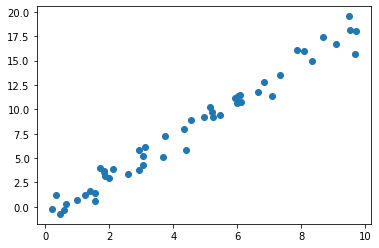

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
print(x[:4])

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
X = x[:, np.newaxis]
model.fit(X, y)
model.coef_, model.intercept_, model.rank_

(array([1.9776566]), -0.9033107255311146, 1)

In [4]:
model.singular_

array([20.22182407])

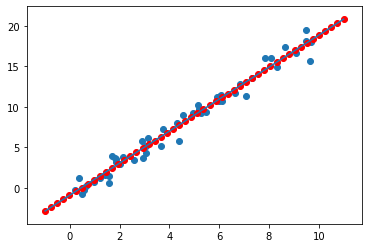

In [5]:
xfit = np.linspace(-1, 11) #test data
Xfit = xfit[:, np.newaxis] #test data converted to 2D array
yfit = model.predict(Xfit) #applying learned model to test data
plt.scatter(x, y)          #plot for original data
plt.plot(xfit, yfit);      #plot for test data
plt.scatter(xfit, yfit, c = 'red')

### Polynomial Regression

In [6]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

 Let's make a 7th-degree polynomial model in this way:

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly = PolynomialFeatures(7)
X = poly.fit_transform(x[:,np.newaxis])

model = LinearRegression()
model.fit(X,y)

xfit = np.linspace(0, 10, 1000)
Xfit = poly.fit_transform(xfit[:,np.newaxis])
yfit = model.predict(Xfit)

In [8]:
model.coef_, model.rank_

(array([ 0.00000000e+00,  3.31250194e-01,  1.28845778e+00, -1.06474496e+00,
         2.90659230e-01, -3.57011703e-02,  2.01614685e-03, -4.20513337e-05]),
 7)

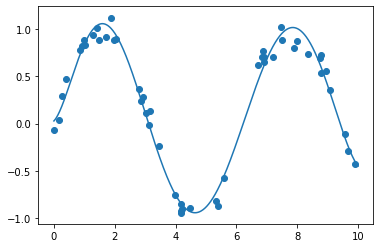

In [9]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

Above process is repeated below, but this time using `make_pipeline`. `RandomState` has been changed

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

rng = np.random.RandomState(123)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
x = x[:,np.newaxis]

poly = PolynomialFeatures(7)
model = LinearRegression()

pipe = make_pipeline(poly, model)

pipe.fit(x,y)


xfit = np.linspace(0, 10, 1000)
Xfit = xfit[:,np.newaxis]
yfit = pipe.predict(Xfit)

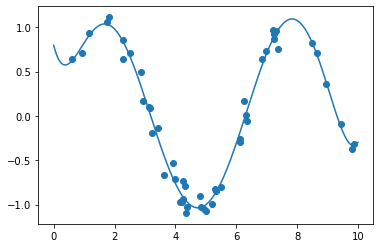

In [11]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [12]:
model.coef_

array([ 0.00000000e+00, -1.34558071e+00,  2.50256668e+00, -1.43126634e+00,
        3.35518934e-01, -3.63259766e-02,  1.74116244e-03, -2.70382188e-05])

In [13]:
model.intercept_

0.7963193659618989

#### Outliers and RANSAC (Random Sample Consensus)

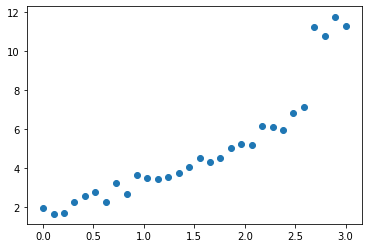

In [14]:
x = np.linspace(0,3,30)
y = 2*x + 1 + np.random.rand(30)
y[26:] = y[26:] + 4                 #make these points outliers
plt.scatter(x,y)

Points shown in upper right corner of above plots are outliers. In some situations we don't want our estimator to consider the while learning. Normally, our model doesn't disregard them as shown below.

In [15]:
lr = LinearRegression(fit_intercept = True)
x = x[:, np.newaxis]
lr.fit(x,y)
lr.coef_, lr.intercept_

(array([2.89794685]), 0.6353268044908269)

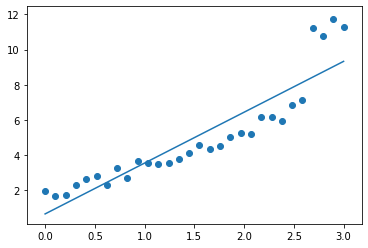

In [16]:
y1 = (x*lr.coef_) + (lr.intercept_)
plt.plot(x, y1)
plt.scatter(x,y)

Notice the value of intercept and weight as learned by our estimator.In above plot, it can be seen that line is slightly tilted toward the outliers. 

In [17]:
from sklearn.linear_model import RANSACRegressor

rs = RANSACRegressor(lr)
rs.fit(x,y)
rsc = rs.estimator_.coef_ , 
rsi = rs.estimator_.intercept_
rsc, rsi

((array([1.90360467]),), 1.5286107480187994)

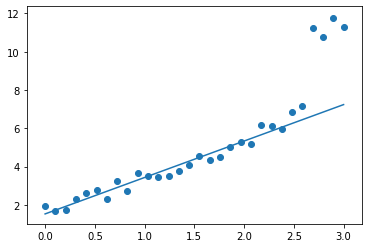

In [18]:
y2= (x*rsc) + rsi
plt.plot(x,y2)
plt.scatter(x,y)

In above case, our model completely disregarded the outliers and this shows in the above plot. Now our line is much better fitted to data without outliers.

### Linear Regression on Boston Data

In [19]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
features = data.data
target = data.target

In [21]:
%matplotlib inline
n = 13
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.DataFrame(features)
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


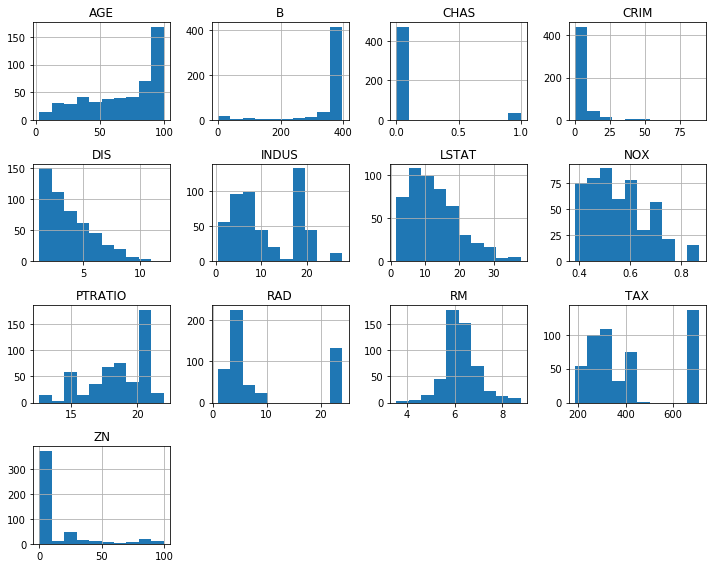

In [22]:
df.hist(figsize = (10,8));
plt.tight_layout()

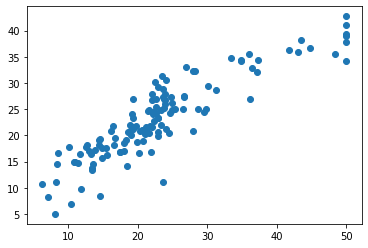

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df,data.target, random_state=1)

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

plt.scatter(ytest, y_predict)

In [24]:


from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_predict)

21.897765396049444

In [26]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model, df, data.target, cv = 7, scoring = 'neg_mean_squared_error')
score1.mean()

-37.287230868353

In [27]:
r2 = cross_val_score(model, df, data.target, cv = 7, scoring = 'r2')
r2


array([ 0.6534446 ,  0.59631685,  0.67865382,  0.61193393,  0.51940514,
       -0.30577687,  0.4001835 ])

#### Ridge Regression on Boston Data

In [28]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = .2)
model

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

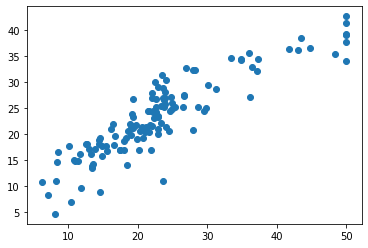

In [29]:
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)
plt.scatter(ytest, y_predict)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_predict)

21.644666904766773

#### LASSO Regression

In [31]:

from sklearn.linear_model import Lasso
model = Lasso(alpha = .01)
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)
mean_squared_error(ytest,y_predict)

21.704589600993447

In [32]:
model.dual_gap_

2.8571398070034775

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/user/scikit_learn_data


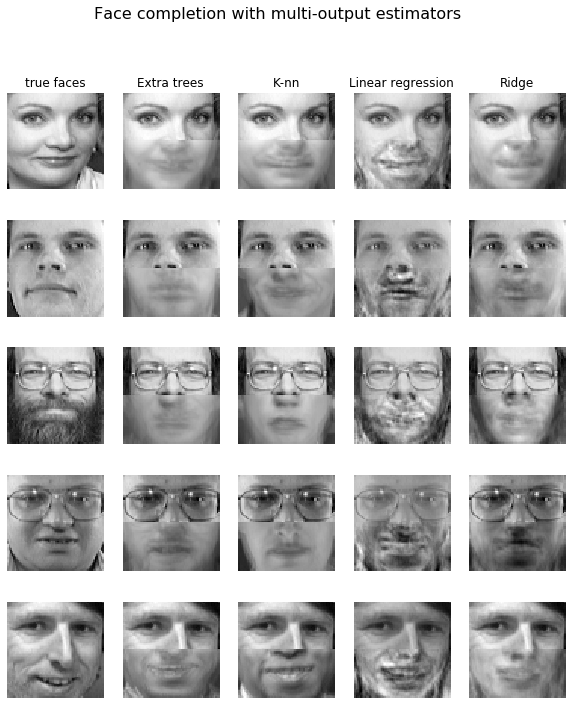

In [33]:
#from page 593 of scikit doc 19.1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
# Load the faces datasets

data = fetch_olivetti_faces()
targets = data.target
data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30] # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]

# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {"Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,random_state=0),
              "K-nn": KNeighborsRegressor(),
              "Linear regression": LinearRegression(),
              "Ridge": RidgeCV(),
}

y_test_predict = dict()

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

    # Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),cmap=plt.cm.gray,interpolation="nearest")
    
    
    